<a href="https://colab.research.google.com/github/divyansh1195/Natural-Language-Processing/blob/master/Restaurant%20Reviews/restaurant_reviews_stem_bow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries and reading the tsv data and fetched resturant file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=12)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
df=pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3) 
df1=pd.read_csv("fetched_resturant_file.csv")

frames = [df, df1]

data = pd.concat(frames)
data = data.reset_index(drop=True)
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
1395,A wonderful dinner. The maÃ®tre de was excepti...,1
1396,"Food was great, staff were attentive. It was v...",1
1397,"Great food and wine, great service. Highly rec...",1
1398,"Beautiful food , wines and a stunning view! Lo...",1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1400 non-null   object
 1   Liked   1400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.0+ KB


In [4]:
data['Liked'].unique()

array([1, 0])

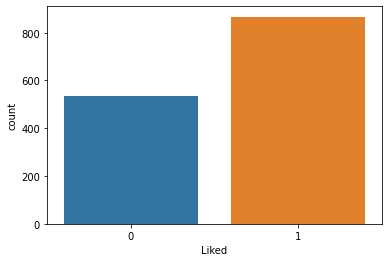

In [5]:
import seaborn as sns
sns.countplot(x='Liked', data=data)
plt.show()

In [6]:
good_reviews_count = len(data.loc[data['Liked'] == 1])
bad_reviews_count=len(data.loc[data['Liked']==0])
(good_reviews_count, bad_reviews_count)

(867, 533)

**So, the dataset is a balanced dataset. The number of '1's and '0's are equal.**

# Data Cleaning

In [7]:
#Data Cleaning
# Cleaning the Text
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
corpus = []
for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not') 
    #remove negative word 'not' as it is closest word to help determine whether the review is good or not 
    review = [stemmer.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

# Create a Bag Of Words Model

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

In [10]:
import pickle
# Creating a pickle file for the CountVectorizer
pickle.dump(cv, open('countvector.pkl', 'wb'))

# Train, Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 200)

# Classifier Model Training

#### 1.Logistic Regression

In [12]:
#Logistic Regression
lr = LogisticRegression(C=1.5, max_iter=2000, solver='lbfgs')
cv = cross_val_score(lr,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
cm=confusion_matrix(y_test, y_pred_lr)
print("\n")
print(cm)

score1 = accuracy_score(y_test,y_pred_lr)
score2 = precision_score(y_test,y_pred_lr)
score3= recall_score(y_test,y_pred_lr)

print("\n")
print("Accuracy of Logistic Regression: ",round(score1*100,2),"%")
print("Precision: ",round(score2,2))
print("Recall: ",round(score3,2))


[0.79787234 0.80851064 0.86170213 0.81914894 0.87096774 0.82795699
 0.84946237 0.84946237 0.8172043  0.86021505 0.82795699 0.82795699]
83.4868069854343


[[ 86  22]
 [ 26 146]]


Accuracy of Logistic Regression:  82.86 %
Precision:  0.87
Recall:  0.85


#### 2.Naive Bayes

In [13]:
#GaussianNB
gnb = GaussianNB(var_smoothing=1e-2)
cv = cross_val_score(gnb,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
cm=confusion_matrix(y_test, y_pred_gnb)
print("\n")
print(cm)

score1 = accuracy_score(y_test,y_pred_gnb)
score2 = precision_score(y_test,y_pred_gnb)
score3= recall_score(y_test,y_pred_gnb)

print("\n")
print("Accuracy of Gaussian NB: ",round(score1*100,2),"%")
print("Precision: ",round(score2,2))
print("Recall: ",round(score3,2))

[0.76595745 0.77659574 0.78723404 0.80851064 0.80645161 0.77419355
 0.74193548 0.87096774 0.79569892 0.76344086 0.74193548 0.69892473]
77.76538549530999


[[ 81  27]
 [ 52 120]]


Accuracy of Gaussian NB:  71.79 %
Precision:  0.82
Recall:  0.7


#### 3.Random Forest Classifier

In [14]:
#Random Forest Classifier
rf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       max_features='log2', min_samples_leaf=2,
                       n_estimators=501)
rf.fit(X_train, y_train)
cv = cross_val_score(rf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_rf = rf.predict(X_test)
cm=confusion_matrix(y_test, y_pred_rf)
print("\n")
print(cm)

score1 = accuracy_score(y_test,y_pred_rf)
score2 = precision_score(y_test,y_pred_rf)
score3= recall_score(y_test,y_pred_rf)

print("\n")
print("Accuracy of Random Forest Classifier: ",round(score1*100,2),"%")
print("Precision: ",round(score2,2))
print("Recall: ",round(score3,2))

[0.68085106 0.64893617 0.71276596 0.72340426 0.68817204 0.67741935
 0.7311828  0.70967742 0.67741935 0.72043011 0.69892473 0.75268817]
70.18226187752612


[[ 23  85]
 [  1 171]]


Accuracy of Random Forest Classifier:  69.29 %
Precision:  0.67
Recall:  0.99


#### 4.SVC

In [15]:
#rbf SVC
from sklearn.svm import SVC
svck = SVC(kernel = 'rbf', random_state = 0, probability=True)
svck.fit(X_train, y_train)
cv = cross_val_score(svck,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_svck = svck.predict(X_test)
cm=confusion_matrix(y_test, y_pred_svck)
print("\n")
print(cm)

score1 = accuracy_score(y_test,y_pred_svck)
score2 = precision_score(y_test,y_pred_svck)
score3= recall_score(y_test,y_pred_svck)

print("\n")
print("Accuracy of rbf_SVC: ",round(score1*100,2),"%")
print("Precision: ",round(score2,2))
print("Recall: ",round(score3,2))

[0.73404255 0.75531915 0.85106383 0.80851064 0.84946237 0.80645161
 0.83870968 0.80645161 0.82795699 0.88172043 0.80645161 0.79569892]
81.34866163349346


[[ 82  26]
 [ 24 148]]


Accuracy of rbf_SVC:  82.14 %
Precision:  0.85
Recall:  0.86


#### Voting Classifier

In [16]:
#VCLF 
voting_clf = VotingClassifier(estimators = [('lr', lr),('gnb', gnb),
                                            ('rf',rf),('svck',svck)], voting = 'soft') 
voting_clf.fit(X_train, y_train)
cv = cross_val_score(voting_clf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_vclf = voting_clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred_vclf)
print("\n")
print(cm)
print(classification_report(y_test, y_pred_vclf))

[0.77659574 0.80851064 0.86170213 0.82978723 0.82795699 0.83870968
 0.80645161 0.89247312 0.89247312 0.82795699 0.8172043  0.79569892]
83.1293372988637


[[ 82  26]
 [ 27 145]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       108
           1       0.85      0.84      0.85       172

    accuracy                           0.81       280
   macro avg       0.80      0.80      0.80       280
weighted avg       0.81      0.81      0.81       280



In [17]:
# Creating a pickle file for the Multinomial Naive Bayes model
filename = 'voting_clf.pkl'
pickle.dump(voting_clf, open(filename, 'wb'))